## Definici√≥n de Problema y Objetivos

### Problema
En la industria musical y an√°lisis de datos, identificar autom√°ticamente el **g√©nero de una canci√≥n** a partir de sus caracter√≠sticas musicales es un reto importante. Los datasets musicales contienen m√∫ltiples variables (como `popularity`, `danceability`, `energy`, `loudness`, `tempo`, entre otras), y estas variables pueden tener diferentes escalas, valores faltantes o inconsistencias que dificultan el entrenamiento de un modelo de clasificaci√≥n preciso.

### Objetivo General
Desarrollar un **modelo de clasificaci√≥n de g√©neros musicales** capaz de predecir el g√©nero de una canci√≥n utilizando sus atributos musicales, con especial atenci√≥n a la calidad de los datos y el preprocesamiento.

### Objetivos Espec√≠ficos
1. **Preprocesamiento de datos:**  
   - Seleccionar las variables m√°s relevantes.    
   - Codificar la variable objetivo (`music_genre`) a formato num√©rico.  
   - Estandarizar los datos para que todas las variables tengan la misma escala.

2. **Entrenamiento del modelo:**  
   - Dividir los datos en conjuntos de entrenamiento y prueba.  
   - Entrenar un `RandomForestClassifier` optimizando los hiperpar√°metros clave para mejorar la precisi√≥n.  
   - Evaluar el modelo usando m√©tricas como accuracy, recall, F1-score y matriz de confusi√≥n.

3. **An√°lisis de importancia de variables:**  
   - Identificar cu√°les caracter√≠sticas influyen m√°s en la predicci√≥n de g√©nero (`popularity`, `danceability`, `energy`, etc.).  
   - Visualizar la relevancia de cada variable para entender mejor el modelo y su comportamiento.

4. **Visualizaci√≥n y presentaci√≥n de resultados:**  
   - Crear gr√°ficos para mostrar la distribuci√≥n de los datos originales y estandarizados.  
   - Mostrar la relaci√≥n entre las variables m√°s importantes y el g√©nero musical.  
   - Presentar la matriz de confusi√≥n y las m√©tricas para evaluar la efectividad del modelo.

### Soluci√≥n Propuesta
Se propone un **flujo completo de procesamiento y modelado** que incluye:  

1. Limpieza y transformaci√≥n de datos.  
2. Codificaci√≥n y estandarizaci√≥n de variables.  
3. Entrenamiento de un modelo `RandomForestClassifier`.  
4. Evaluaci√≥n y visualizaci√≥n de resultados mediante m√©tricas y gr√°ficos.  

Este enfoque permite predecir g√©neros musicales de manera eficiente y entender qu√© caracter√≠sticas musicales influyen m√°s en la clasificaci√≥n.


Cargar el dataset original


Crear Notebook notebooks

## Primera celda: leer CSV y manejar problemas comunes de formato:

In [1]:
import pandas as pd
from plotnine import (
    ggplot, aes, geom_point, geom_abline,
    labs, theme, element_line, scale_color_manual,
    coord_cartesian, xlim, ylim
)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


### Exploraci√≥n inicial de datos (EDA)

In [2]:
import pandas as pd

# Cargar CSV con par√°metros que manejan comas dentro de los campos y valores faltantes
df = pd.read_csv(
    "dataset//music_genre.csv"
)

# Ver primeras filas
print(df.head())
# Reemplazar las claves con valores num√©ricos, ver rango MIDI
df['key'] = df['key'].replace(('C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'), range(0, 12))
# Filtrar solo las columnas importantes y modificar g√©neros
df['music_genre'] = df['music_genre'].apply(
    lambda genre: 'Rap' if genre == 'Hip-Hop' and genre not in ['Alternative', 'Anime'] else genre)
# Reemplazar modo con binario
df['mode'] = df['mode'].apply(lambda mode: 0 if mode == 'Minor' else 1 if mode == 'Major' else mode)

df_filtrado = df[
    (df['music_genre'] != 'Anime') & (df['music_genre'] != 'Alternative') & (df['tempo'] != '?') & (df['music_genre'].notna())
][['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence', 'music_genre']]

# Guardar versi√≥n filtrada para an√°lisis posterior
df_filtrado.to_csv("dataset//fdata.csv", index=False)


   instance_id           artist_name            track_name  popularity  \
0      32894.0              R√∂yksopp  R√∂yksopp's Night Out        27.0   
1      46652.0  Thievery Corporation      The Shining Path        31.0   
2      30097.0        Dillon Francis             Hurricane        28.0   
3      62177.0              Dubloadz                 Nitro        34.0   
4      24907.0           What So Not      Divide & Conquer        32.0   

   acousticness  danceability  duration_ms  energy  instrumentalness key  \
0       0.00468         0.652         -1.0   0.941           0.79200  A#   
1       0.01270         0.622     218293.0   0.890           0.95000   D   
2       0.00306         0.620     215613.0   0.755           0.01180  G#   
3       0.02540         0.774     166875.0   0.700           0.00253  C#   
4       0.00465         0.638     222369.0   0.587           0.90900  F#   

   liveness  loudness   mode  speechiness               tempo obtained_date  \
0     0.115    -5

C:\Users\nesto\AppData\Local\Temp\ipykernel_21384\2520525118.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


### Visualizaci√≥n de datos con plotnine

---

La gr√°fica que vemos muestra la importancia de cada variable en el modelo de clasificaci√≥n de g√©neros musicales.  
Cada barra representa una caracter√≠stica del audio, como `acousticness` o `loudness`, y su altura indica cu√°nto contribuye esa variable a que el modelo acierte en la predicci√≥n del g√©nero.

Por ejemplo, si la barra de `acousticness` es m√°s alta que la de `loudness`, significa que el modelo considera que la caracter√≠stica ac√∫stica es m√°s relevante para diferenciar los g√©neros musicales en este dataset.

Esta informaci√≥n nos ayuda a entender qu√© aspectos musicales son m√°s √∫tiles para que una inteligencia artificial clasifique correctamente las canciones seg√∫n su g√©nero.  
As√≠, podemos saber en qu√© variables debemos enfocarnos si queremos mejorar el modelo o analizar la m√∫sica desde un punto de vista t√©cnico.

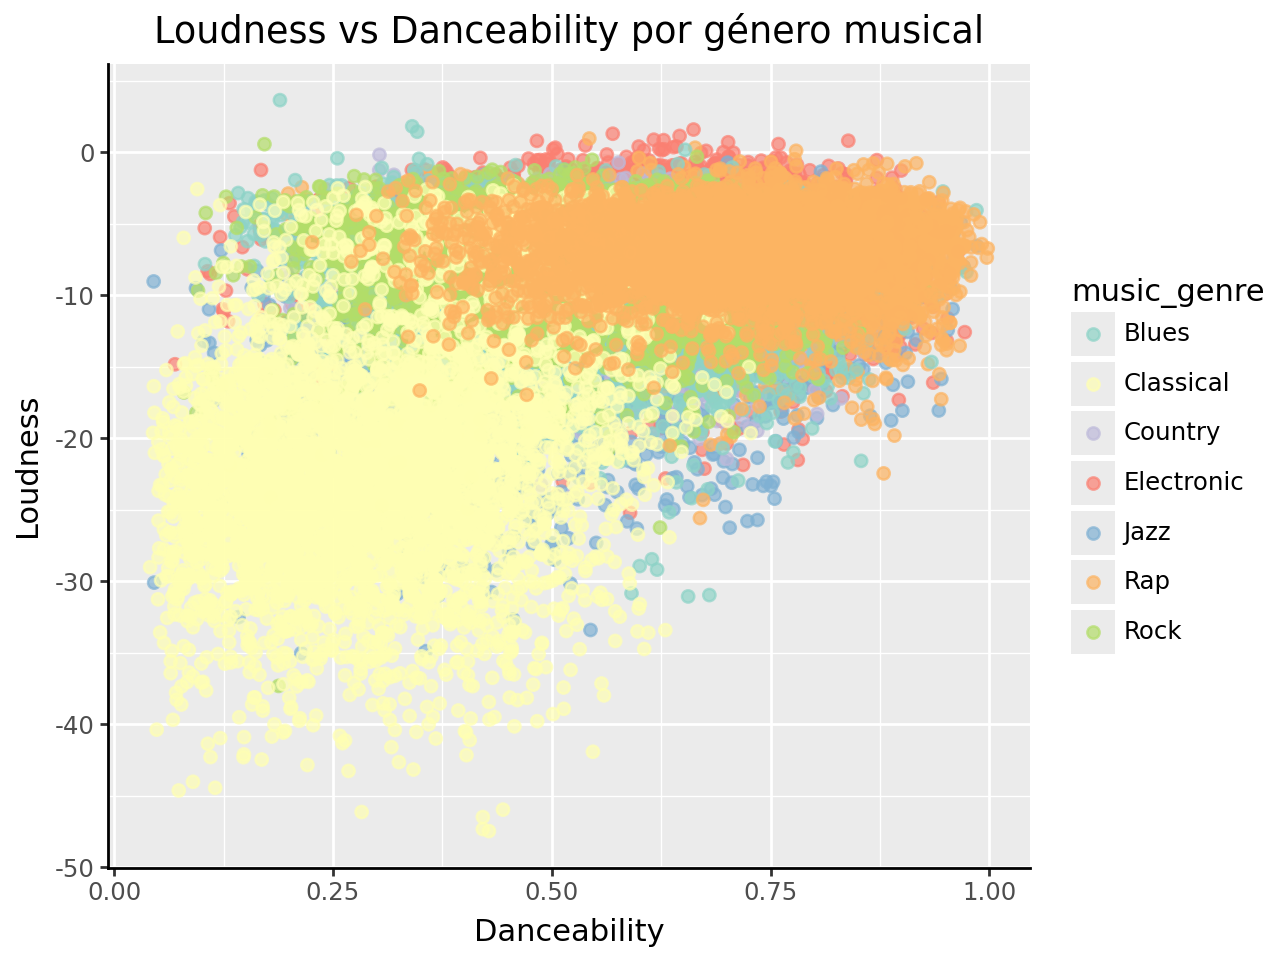

In [4]:
from plotnine import ggplot, aes, geom_jitter, labs, theme, element_line, scale_color_brewer
import pandas as pd

# Leer CSV filtrado
df_filtrado = pd.read_csv("dataset/fdata.csv")

plot = (#aqui cambie por danceability porque 
    ggplot(df_filtrado, aes(x='danceability', y='loudness', color='music_genre'))
    + geom_jitter(width=0.02, height=0.5, size=2, alpha=0.7)  # Jitter para separar puntos
    + scale_color_brewer(type='qual', palette='Set3')         # Paleta de colores variada
    + labs(title='Loudness vs Danceability por g√©nero musical',  # aqui cambie el titulo porque lo q estabamos realmente usado era la   danceability PERO SI QUIEREN CAMBIAR LO PUEDEN HACER tocaria cambiar en el resto del codigo tambien
           x='Danceability', y='Loudness')
    + theme(
        axis_line_x=element_line(color='black', size=1),
        axis_line_y=element_line(color='black', size=1)
    )
)

# Mostrar gr√°fico en el notebook
plot


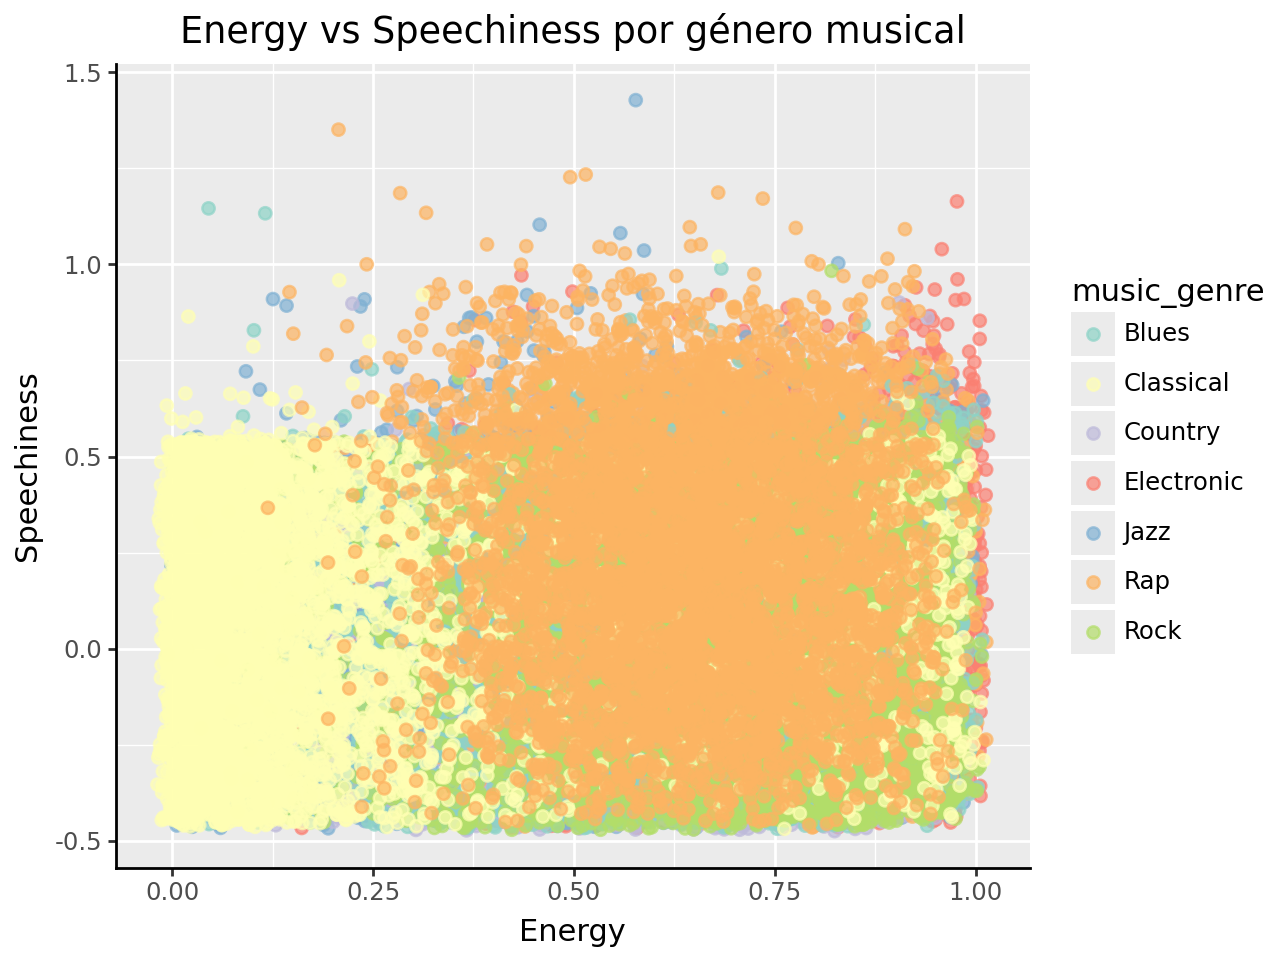

In [5]:
from plotnine import ggplot, aes, geom_jitter, labs, theme, element_line, scale_color_brewer
import pandas as pd

# Leer CSV filtrado
df_filtrado = pd.read_csv("dataset/fdata.csv")

plot = (
    ggplot(df_filtrado, aes(x='energy', y='speechiness', color='music_genre'))
    + geom_jitter(width=0.02, height=0.5, size=2, alpha=0.7)  # Jitter para separar puntos
    + scale_color_brewer(type='qual', palette='Set3')         # Paleta de colores variada
    + labs(title='Energy vs Speechiness por g√©nero musical',
           x='Energy', y='Speechiness')                      # Ajuste de etiquetas
    + theme(
        axis_line_x=element_line(color='black', size=1),
        axis_line_y=element_line(color='black', size=1)
    )
)

plot


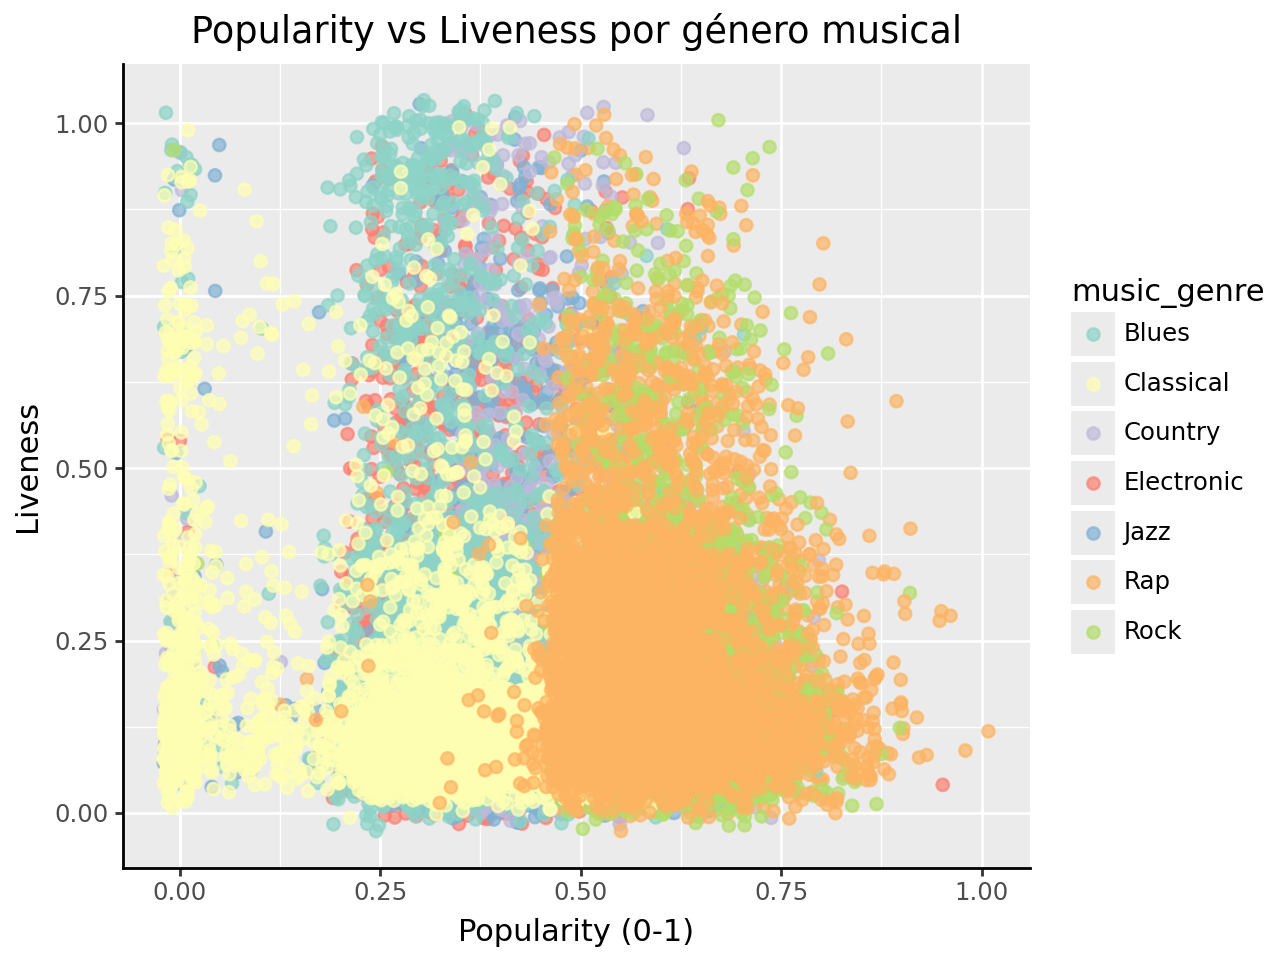

In [6]:
from plotnine import ggplot, aes, geom_jitter, labs, theme, element_line, scale_color_brewer
import pandas as pd

# Leer CSV filtrado
df_filtrado = pd.read_csv("dataset/fdata.csv")

# Escalar popularity a 0-1 para que tenga la misma escala que las dem√°s variables para la grafica no AFECTA A PRECISION DEL MODELO
df_filtrado['popularity_scaled'] = df_filtrado['popularity'] / 100

# Crear gr√°fico usando la variable escalada
plot = (
    ggplot(df_filtrado, aes(x='popularity_scaled', y='liveness', color='music_genre'))
    + geom_jitter(width=0.02, height=0.05, size=2, alpha=0.7)
    + scale_color_brewer(type='qual', palette='Set3')
    + labs(title='Popularity vs Liveness por g√©nero musical',
           x='Popularity (0-1)', y='Liveness')
    + theme(
        axis_line_x=element_line(color='black', size=1),
        axis_line_y=element_line(color='black', size=1)
    )
)

# Mostrar gr√°fico
plot



### Preprocesamiento de datos



---



En el preprocesamiento de datos, seleccionamos las variables relevantes (`acousticness` y `loudness`), codificamos la variable objetivo (`music_genre`) y estandarizamos los datos para que todas las variables tengan la misma escala.  
La gr√°fica muestra c√≥mo los datos originales se transforman tras la estandarizaci√≥n, lo que ayuda a que el modelo de clasificaci√≥n funcione mejor y no se vea afectado por diferencias de escala entre las variables.




En el preprocesamiento de datos, seleccionamos las variables relevantes, codificamos la variable objetivo y estandarizamos los datos para que todas las variables tengan la misma escala.  
La gr√°fica muestra c√≥mo los datos originales se transforman tras la estandarizaci√≥n, lo que ayuda a que el modelo funcione mejor y no se vea afectado por diferencias de escala entre las variables.



### Selecci√≥n de variables
Seleccionamos las columnas m√°s relevantes para la predicci√≥n:  
`popularity`, `acousticness`, `danceability`, `duration_ms`, `energy`, `instrumentalness`, `liveness`, `loudness`, `mode`, `speechiness`, `tempo`, `valence`  
y la variable objetivo: `music_genre`.

---

### Tratamiento de datos faltantes y tipos
- Convertimos `tempo` a num√©rico.  
- Rellenamos los valores faltantes con la mediana de cada columna.

---

### Codificaci√≥n de la variable objetivo
Usamos `LabelEncoder` para convertir los g√©neros musicales en n√∫meros, de forma que el modelo pueda procesarlos.

---

### Estandarizaci√≥n
Usamos `StandardScaler` para que todas las variables num√©ricas tengan la misma escala (media 0 y desviaci√≥n 1).

---

### Divisi√≥n en entrenamiento y prueba
Separamos los datos en `X_train`, `X_test`, `y_train` y `y_test` con un 25% de los datos para prueba.

---

### Visualizaci√≥n de los datos antes y despu√©s de estandarizar
- La gr√°fica **izquierda** muestra los datos originales, donde cada variable tiene su propia escala.  
- La gr√°fica **derecha** muestra los datos despu√©s de la estandarizaci√≥n, donde todas las variables est√°n en la misma escala.

---


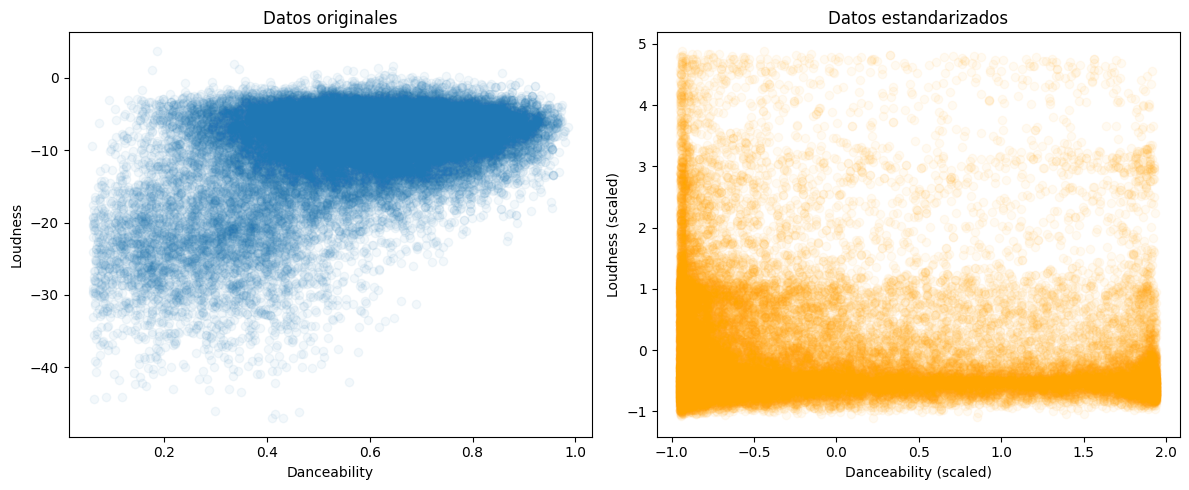

In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Selecci√≥n de variables
X = df_filtrado[['popularity', 'acousticness', 'danceability', 'duration_ms', 
                 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 
                 'mode', 'speechiness', 'tempo', 'valence']]
y = df_filtrado['music_genre']

# Codificar etiquetas de texto a n√∫meros
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Escalar caracter√≠sticas num√©ricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.25, random_state=42)

# Visualizaci√≥n de datos antes y despu√©s de escalar
fig, axs = plt.subplots(1, 2, figsize=(12,5))

# Antes de escalar
axs[0].scatter(X['danceability'], X['loudness'], alpha=0.05)
axs[0].set_title('Datos originales')
axs[0].set_xlabel('Danceability')
axs[0].set_ylabel('Loudness')

# Despu√©s de escalar
axs[1].scatter(X_scaled[:,1], X_scaled[:,7], alpha=0.05, color='orange')  
axs[1].set_title('Datos estandarizados')
axs[1].set_xlabel('Danceability (scaled)')
axs[1].set_ylabel('Loudness (scaled)')

plt.tight_layout()
plt.show()




**Explicaci√≥n:**  
- La tabla de m√©tricas mostrar√° precisi√≥n, recall y F1-score para cada g√©nero musical, permitiendo comparar el desempe√±o por clase y ver el accuracy general.


- La estandarizaci√≥n ayuda a que el modelo Random Forest no se vea afectado por diferencias de escala, aunque para este tipo de modelo no es estrictamente necesario, mejora la visualizaci√≥n y la consistencia de los datos.


La gr√°fica de la izquierda muestra los datos originales, donde cada variable tiene su propia escala.
La gr√°fica de la derecha muestra los datos despu√©s de la estandarizaci√≥n, donde ambas variables tienen la misma escala.

### Entrenamiento de modelo

Aqu√≠ los hiperpar√°metros son:

n_estimators=100 (n√∫mero de √°rboles)
random_state=42 (semilla para reproducibilidad)

<h3>Modelo de arbol de decisi√≥n</h3>

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Crear y entrenar Random Forest con hiperpar√°metros optimizados 
model = RandomForestClassifier(
    n_estimators=1000,       # M√°s √°rboles para mayor estabilidad
    max_depth=25,            # Limita profundidad para evitar sobreajuste
    min_samples_leaf=15,     # Evita hojas con pocas muestras
    max_features='sqrt',     # Mejora precisi√≥n combinando variables
    random_state=42,
    n_jobs=-1,               # Usa todos los n√∫cleos disponibles
    class_weight='balanced'  # Maneja clases desbalanceadas
)

model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=25,
                       min_samples_leaf=15, n_estimators=1000, n_jobs=-1,
                       random_state=42)

<h3>Modelo de descenso de gradiente</h3>

Instalar con <label style="color:red;"><b>python - pip install xgboost</b></label>.

In [11]:
# Import XGBoost
from xgboost import XGBClassifier

# Create the XGBoost model
model = XGBClassifier(
    n_estimators=500,         # Number of trees
    max_depth=6,              # Maximum depth of trees
    learning_rate=0.05,       # Smaller learning rate
    subsample=0.8,            # Use 80% of the data for each tree
    colsample_bytree=0.8,     # Use 80% of features for each tree
    min_child_weight=3,       # Minimum child weight
    gamma=1,                  # Minimum loss reduction for splits
    random_state=42,          # For reproducibility
    objective='multi:softmax',# Multi-class classification
    eval_metric='mlogloss',   # Log loss for multi-class
    use_label_encoder=False
)

# Train the model
model.fit(X_train, y_train)

/home/alex/Escritorio/trabajoai/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:42:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, ...)

### Evaluaci√≥n del modelo

## ¬øQu√© es la matriz de confusi√≥n?

Es una tabla que te muestra cu√°ntas veces el modelo predijo correctamente o incorrectamente cada clase (g√©nero musical).

---

### ¬øC√≥mo leerla?

- **Filas:** Representan los g√©neros reales (verdaderos) de las canciones.
- **Columnas:** Representan los g√©neros que el modelo predijo.

Cada celda indica el n√∫mero de canciones que pertenecen al g√©nero de la fila y fueron clasificadas como el g√©nero de la columna.

---

#### Ejemplo visual

|         | Predicho: Rock | Predicho: Jazz |
|---------|----------------|----------------|
| Real: Rock  |     18         |      1        |
| Real: Jazz  |      2         |     15        |

- **Diagonal principal (de arriba a la izquierda a abajo a la derecha):** Son los aciertos (predicciones correctas).
- **Fuera de la diagonal:** Son los errores (por ejemplo, canciones de Jazz clasificadas como Pop).

---

### ¬øQu√© g√©neros son m√°s f√°ciles de predecir?

- Si un g√©nero tiene casi todos sus valores en la diagonal, el modelo lo predice bien.
- Si hay muchos valores fuera de la diagonal para un g√©nero, el modelo se confunde con otros g√©neros.

---

**Consejo:** Busca los valores m√°s altos en la diagonal para saber qu√© g√©neros se predicen mejor y observa los errores para saber d√≥nde el modelo falla.


Accuracy: 0.7507494171200177

Reporte de clasificaci√≥n:
               precision    recall  f1-score   support

       Blues       0.70      0.62      0.66      1125
   Classical       0.92      0.88      0.90      1153
     Country       0.68      0.66      0.67      1125
  Electronic       0.73      0.68      0.70      1116
        Jazz       0.63      0.61      0.62      1154
         Rap       0.88      0.91      0.90      2256
        Rock       0.60      0.73      0.66      1078

    accuracy                           0.75      9007
   macro avg       0.73      0.73      0.73      9007
weighted avg       0.75      0.75      0.75      9007



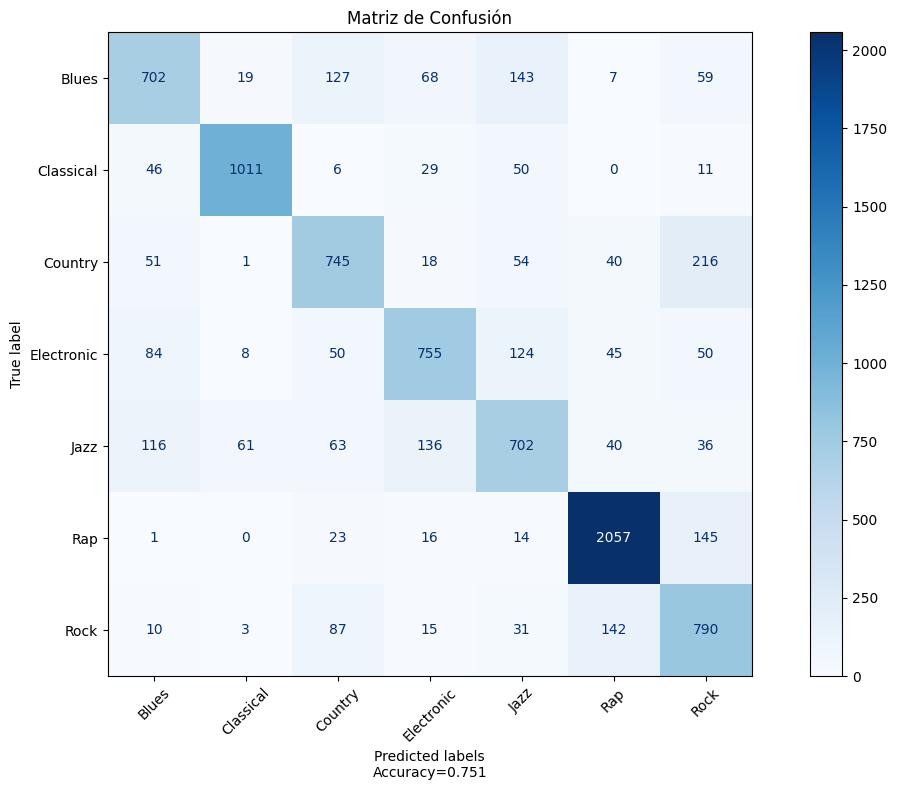

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predicciones
y_pred = model.predict(X_test)

# Convertir los nombres de las clases a string
target_names = [str(c) for c in le.classes_]

# M√©tricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificaci√≥n:\n", classification_report(y_test, y_pred, target_names=target_names))

# Matriz de confusi√≥n mejorada
# Matriz de confusi√≥n mejorada
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(12, 8))  # M√°s espacio para muchas clases
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues', ax=ax, xticks_rotation=45, values_format='d')  # N√∫meros enteros
plt.title('Matriz de Confusi√≥n')
disp.ax_.set_xlabel(f'Predicted labels\nAccuracy={accuracy_score(y_test, y_pred):.3f}')
plt.tight_layout()
plt.show()








---

### Conclusiones y comunicaci√≥n
Interpretar: ¬øQu√© g√©neros son m√°s f√°ciles de predecir?

La gr√°fica muestra qu√© tan importante es cada variable para que el modelo clasifique correctamente el g√©nero musical.  
Cada barra representa una variable (por ejemplo, `acousticness` y `loudness`) y su altura indica cu√°nto contribuye al modelo.  
Las variables con barras m√°s altas son m√°s relevantes para la predicci√≥n.  
Esto ayuda a entender qu√© caracter√≠sticas musicales influyen m√°s en la clasificaci√≥n autom√°tica de g√©neros.

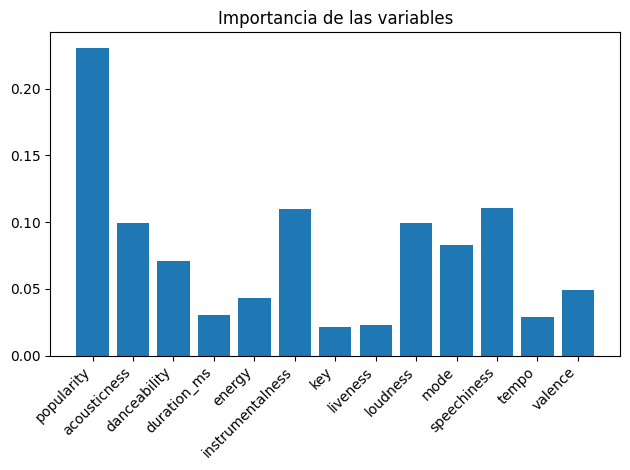

In [26]:
import matplotlib.pyplot as plt
import numpy as np

importances = model.feature_importances_
features = X.columns

plt.bar(features, importances)
plt.xticks(rotation=45, ha='right')
plt.title("Importancia de las variables")
plt.tight_layout()  # ajusta todo para que quepa
plt.show()


<h3>Pruebas Invidualizadas</h3>

En un segundo testeo, probamos la capacidad de predicci√≥n del modelo cuando introducimos las car√°cter√≠sticas de sonido de las canciones individualmente.

In [29]:
import numpy as np

# Funci√≥n para predecir el g√©nero a partir de caracter√≠sticas introducidas
def predecir_genero_manual(model, scaler, le):
    print("Introduce las caracter√≠sticas de la canci√≥n:")
    try:
        features = {}
        features['popularity'] = float(input("Popularidad (0-100): "))
        features['acousticness'] = float(input("Acousticness (0-1): "))
        features['danceability'] = float(input("Danceability (0-1): "))
        features['duration_ms'] = float(input("Duraci√≥n en ms: "))
        features['energy'] = float(input("Energy (0-1): "))
        features['instrumentalness'] = float(input("Instrumentalness (0-1): "))
        features['key'] = int(input("Key (0=C, 1=C#, ..., 11=B): "))
        features['liveness'] = float(input("Liveness (0-1): "))
        features['loudness'] = float(input("Loudness (dB negativos, ej -5): "))
        features['mode'] = int(input("Mode (0=Minor, 1=Major): "))
        features['speechiness'] = float(input("Speechiness (0-1): "))
        features['tempo'] = float(input("Tempo (BPM): "))
        features['valence'] = float(input("Valence (0-1): "))

        # Convertir a vector en el mismo orden que X
        X_new = np.array([[features['popularity'], features['acousticness'], features['danceability'], 
                           features['duration_ms'], features['energy'], features['instrumentalness'], 
                           features['key'], features['liveness'], features['loudness'], features['mode'], 
                           features['speechiness'], features['tempo'], features['valence']]])
        
        # Escalar con el scaler usado en entrenamiento
        X_new_scaled = scaler.transform(X_new)
        
        # Predicci√≥n
        pred = model.predict(X_new_scaled)
        genero = le.inverse_transform(pred)[0]
        
        # Orden de las variables como en el modelo
        feature_names = ['popularity', 'acousticness', 'danceability', 
                        'duration_ms', 'energy', 'instrumentalness', 
                        'key', 'liveness', 'loudness', 'mode', 
                        'speechiness', 'tempo', 'valence']

        print("\nDatos introducidos (nombre: valor):")
        for name in feature_names:
            print(f"{name}: {features[name]}")

        
        print(f"\nüéµ El modelo predice que el g√©nero de la canci√≥n es: **{genero}**")
    except Exception as e:
        print("Error en la entrada:", e)

# Ejemplo de uso:

predecir_genero_manual(model, scaler, le)


Introduce las caracter√≠sticas de la canci√≥n:

Datos introducidos (nombre: valor):
popularity: 37.0
acousticness: 0.8440000000000001
danceability: 627.0
duration_ms: 328414.0
energy: 286.0
instrumentalness: 918.0
key: 1
liveness: 0.0886
loudness: -10119.0
mode: 1
speechiness: 0.0317
tempo: 144967.0
valence: 108.0

üéµ El modelo predice que el g√©nero de la canci√≥n es: **Electronic**


/home/alex/Escritorio/trabajoai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names


En el anterior intento de predecir el g√©nero de una canci√≥n seg√∫n los datos de una canci√≥n de Jazz, podemos ver como se equivoca prediciendo que es de Electr√≥nica, ya que este g√©nero tiene poca tasa de acierto.

In [30]:
predecir_genero_manual(model, scaler, le)

Introduce las caracter√≠sticas de la canci√≥n:

Datos introducidos (nombre: valor):
popularity: 73.0
acousticness: 419.0
danceability: 0.8029999999999999
duration_ms: 254720.0
energy: 0.56
instrumentalness: 0.0
key: 1
liveness: 0.0608
loudness: -6.912000000000001
mode: 0
speechiness: 0.0398
tempo: 133679.0
valence: 0.77

üéµ El modelo predice que el g√©nero de la canci√≥n es: **Rap**


/home/alex/Escritorio/trabajoai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names


En este caso de uso podemos ver como predice correctamente el g√©nero de una canci√≥n de Rap con los datos introducidos, sobretodo gracias a que este g√©nero tiene una tasa de acierto bastante elevada, siendo la m√°s acertada.